In [56]:
import copy

import matplotlib.pyplot as plt
import numpy as np

In [57]:
square = np.concatenate(
    [
        np.zeros(300),
        np.ones(600),
        np.zeros(300),
    ]
)

triangle = np.concatenate(
    [
        np.zeros(300),
        np.linspace(0, 1, 300),
        np.linspace(1, 0, 300),
        np.zeros(300),
    ]
)

exp = np.concatenate(
    [
        np.zeros(300),
        np.logspace(0, -10, 900),
    ]
)


In [58]:
def draw_plots(data: list[list[float]]) -> None:
    """Draw multiple plots."""
    _, ax = plt.subplots(dpi=150)
    ax.set_xlabel("Time, samples")
    ax.set_ylabel("Amplitudes")
    t = range(len(data[0]))
    for x in data:
        ax.plot(t, x, alpha=0.8)
    plt.show()

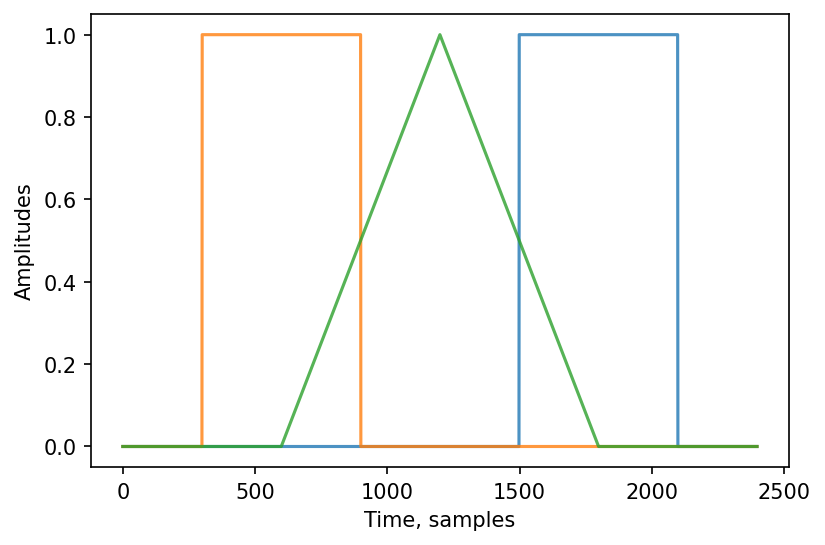

In [59]:
x1 = copy.deepcopy(square)
x2 = copy.deepcopy(square)
conv = np.convolve(x1, x2)

x1 = np.pad(x1, (len(conv) - len(x1), 0), "constant", constant_values=(0,))
x2 = np.pad(x2, (0, len(conv) - len(x2)), "constant", constant_values=(0,))
conv /= np.max(conv)

draw_plots([x1, x2, conv])

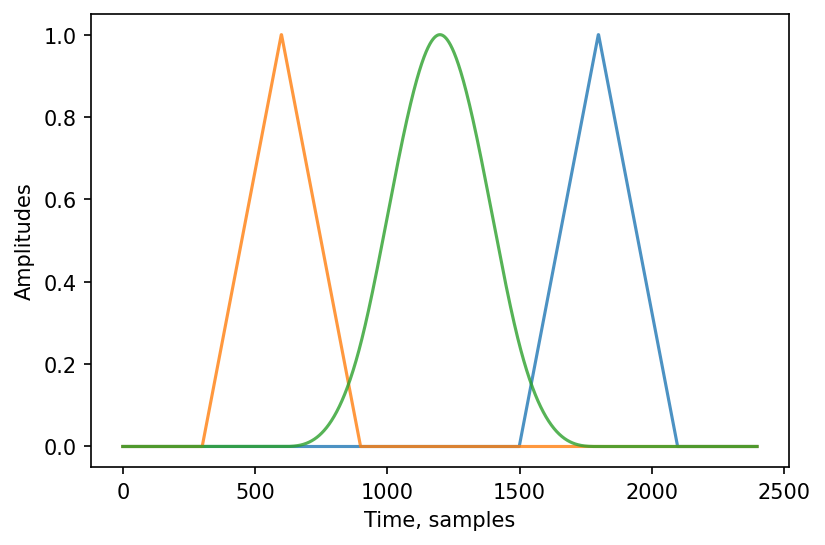

In [60]:
x1 = copy.deepcopy(triangle)
x2 = copy.deepcopy(triangle)
conv = np.convolve(x1, x2)

x1 = np.pad(x1, (len(conv) - len(x1), 0), "constant", constant_values=(0,))
x2 = np.pad(x2, (0, len(conv) - len(x2)), "constant", constant_values=(0,))
conv /= np.max(conv)

draw_plots([x1, x2, conv])

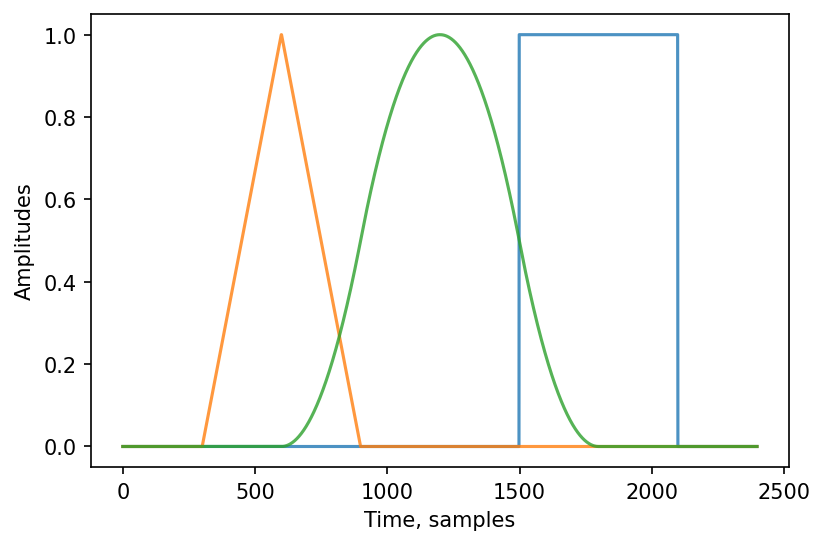

In [61]:
x1 = copy.deepcopy(square)
x2 = copy.deepcopy(triangle)
conv = np.convolve(x1, x2)

x1 = np.pad(x1, (len(conv) - len(x1), 0), "constant", constant_values=(0,))
x2 = np.pad(x2, (0, len(conv) - len(x2)), "constant", constant_values=(0,))
conv /= np.max(conv)

draw_plots([x1, x2, conv])

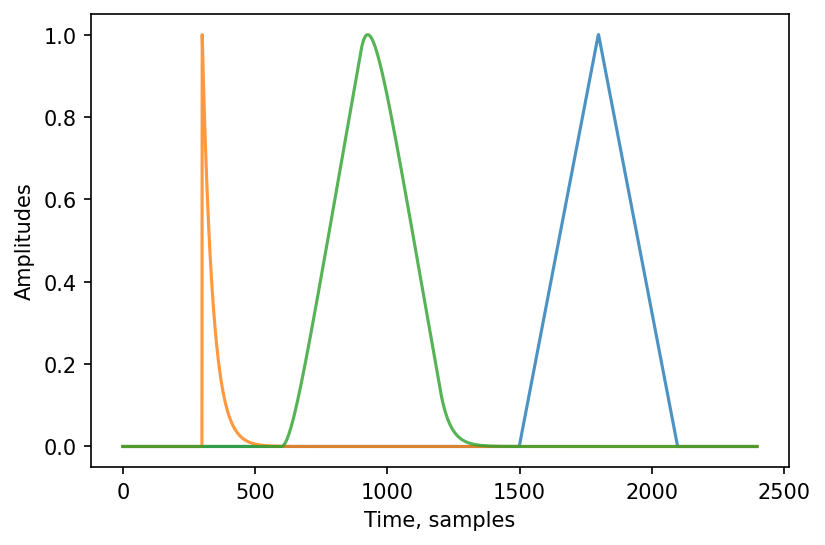

In [62]:
x1 = copy.deepcopy(triangle)
x2 = copy.deepcopy(exp)
conv = np.convolve(x1, x2)

x1 = np.pad(x1, (len(conv) - len(x1), 0), "constant", constant_values=(0,))
x2 = np.pad(x2, (0, len(conv) - len(x2)), "constant", constant_values=(0,))
conv /= np.max(conv)

draw_plots([x1, x2, conv])

c:\Users\Wicirelllis\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


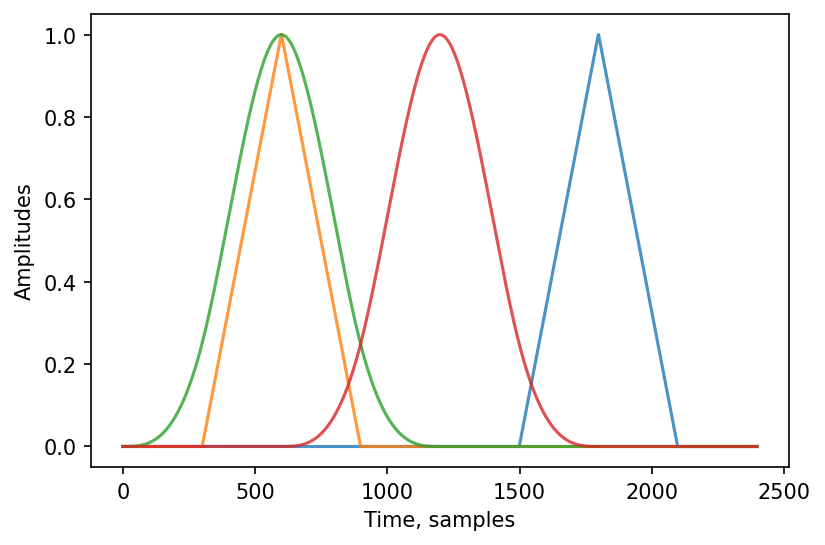

In [66]:
x1 = copy.deepcopy(triangle)
x2 = copy.deepcopy(triangle)
conv_raw = np.convolve(x1, x2)
conv_raw /= np.max(conv_raw)

fft_1 = np.fft.fft(x1)
fft_2 = np.fft.fft(x2)
fft_conv = fft_1 * fft_2
conv = np.fft.ifft(fft_conv)

x1 = np.pad(x1, (len(conv_raw) - len(x1), 0), "constant", constant_values=(0,))
x2 = np.pad(x2, (0, len(conv_raw) - len(x2)), "constant", constant_values=(0,))
conv /= np.max(conv)
conv = np.roll(conv, len(conv) // 2)
conv = np.pad(conv, (0, len(conv_raw) - len(conv)), "constant", constant_values=(0,))

draw_plots([x1, x2, conv, conv_raw])

Я не справился написать фукцию свертки самостоятельно\руками и сделать последний вопрос про проверку теоремы о свертке.
Не уверен почему, но у меня получались разные графики, хотя выше для двух треугольных сигналов теорема о свертке сработала.